<a href="https://www.kaggle.com/code/siddp6/mnist-neural-network-from-scratch?scriptVersionId=176057456" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np

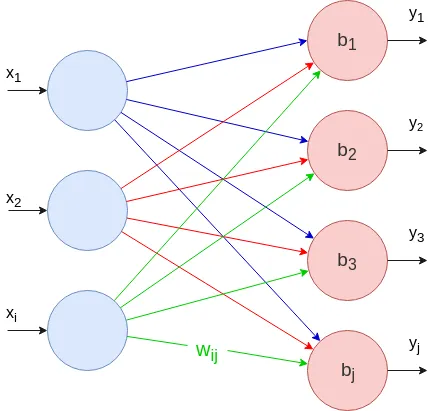

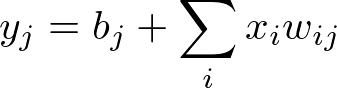


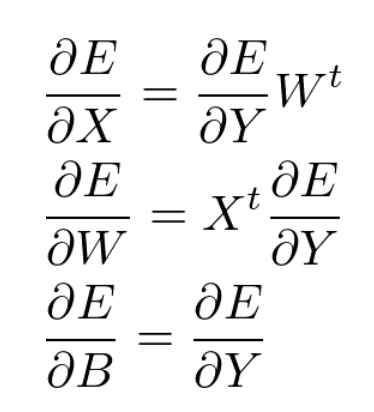

In [2]:
class FullyConnectedLayer():
    def __init__(self, input_size, prediction_size):
        self.weights = np.random.rand(input_size, prediction_size) 
        self.bias = np.random.rand(1, prediction_size) 
    
    def forward(self, input):
        self.input = input
        self.prediction = np.dot(self.input, self.weights) + self.bias
        return self.prediction
    
    def backward(self, error_derivative, lr):
        input_error = np.dot(error_derivative, self.weights.T)
        weights_error = np.dot(self.input.T, error_derivative)
        bias_error = error_derivative
        
        self.weights -= lr * weights_error
        self.bias -= lr * bias_error 
        
        return input_error # this will be the prediction error for previous layer

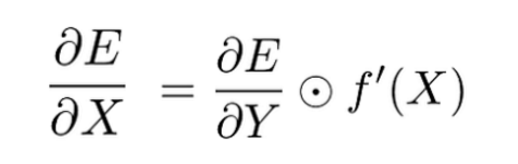

In [3]:
class ActivationLayer():
    def __init__(self, activation, activation_derivation):
        self.activation = activation
        self.activation_derivation = activation_derivation
    
    def forward(self, input):
        self.input = input
        self.prediction = self.activation(self.input)
        return self.prediction
    
    def backward(self, error_derivative, lr):
        return self.activation_derivation(self.input) * error_derivative

In [4]:
def tanh(x): return np.tanh(x)
def tanh_derivation(x): return 1-np.tanh(x)**2

In [5]:
def mse(y_true, y_pred): return np.mean(np.power(y_true-y_pred, 2))
def mse_dervivation(y_true, y_pred):   return 2*(y_pred-y_true)/y_true.size

In [6]:
class Network:
    def __init__(self):
        self.layers = list()
        self.loss = None
        self.loss_derivation = None
    
    def add(self, layer):
        self.layers.append(layer)
        
    def set_loss(self, loss, loss_derivation):
        self.loss = loss
        self.loss_derivation = loss_derivation
    
    def predict(self, inputs):
        results = list()
        
        for idx in range(len(inputs)):
            prediction = inputs[idx]
            for layer in self.layers:
                prediction = layer.forward(prediction)
            results.append(prediction)
        return results
    
    def fit(self, inputs, predictions, epochs, lr):
        for epoch in range(epochs):
            cur_epoch_error = 0
            for idx in range(len(inputs)):
                prediction = inputs[idx]
                for layer in self.layers:
                    prediction = layer.forward(prediction)

                cur_epoch_error += self.loss(predictions[idx], prediction)
                error_derivation = self.loss_derivation(predictions[idx], prediction)
                
                for layer in reversed(self.layers):
                    error_derivation = layer.backward(error_derivation, lr)   

            cur_err = cur_epoch_error / len(inputs)
            print('epoch %d/%d   error=%f' % (epoch+1, epochs, cur_epoch_error))

# XOR

In [7]:
# training data
x_train = np.array([[[0,0]], [[0,1]], [[1,0]], [[1,1]]])
y_train = np.array([[[0]], [[1]], [[1]], [[0]]])

# network
net = Network()
net.add(FullyConnectedLayer(2, 3))
net.add(ActivationLayer(tanh, tanh_derivation))
net.add(FullyConnectedLayer(3, 1))
net.add(ActivationLayer(tanh, tanh_derivation))

# train
net.set_loss(mse, mse_dervivation)
net.fit(x_train, y_train, epochs=100, lr=0.1)

# test
out = net.predict(x_train)
print(out)

epoch 1/100   error=1.318452
epoch 2/100   error=1.254169
epoch 3/100   error=1.214027
epoch 4/100   error=1.187740
epoch 5/100   error=1.168200
epoch 6/100   error=1.152566
epoch 7/100   error=1.139637
epoch 8/100   error=1.128683
epoch 9/100   error=1.119167
epoch 10/100   error=1.110689
epoch 11/100   error=1.102955
epoch 12/100   error=1.095755
epoch 13/100   error=1.088940
epoch 14/100   error=1.082406
epoch 15/100   error=1.076082
epoch 16/100   error=1.069921
epoch 17/100   error=1.063893
epoch 18/100   error=1.057977
epoch 19/100   error=1.052161
epoch 20/100   error=1.046440
epoch 21/100   error=1.040809
epoch 22/100   error=1.035268
epoch 23/100   error=1.029817
epoch 24/100   error=1.024457
epoch 25/100   error=1.019190
epoch 26/100   error=1.014015
epoch 27/100   error=1.008933
epoch 28/100   error=1.003945
epoch 29/100   error=0.999050
epoch 30/100   error=0.994246
epoch 31/100   error=0.989533
epoch 32/100   error=0.984909
epoch 33/100   error=0.980370
epoch 34/100   erro

# MNIST

In [8]:
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt


In [9]:
def transform_image(image):
    image = image.convert('L')
    image = image.resize((28, 28))
    image = list(image.getdata())
    image = np.array(image)
    image = image.reshape(1, -1)
    return image

def transform_label(label):
    new_label = [0] * 10
    new_label[label] = 1
    new_label = np.array(new_label)
    new_label = new_label.reshape(1, -1)
    return new_label

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:08<00:00, 1238596.32it/s]


Extracting /data/MNIST/raw/train-images-idx3-ubyte.gz to /data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 157983.64it/s]


Extracting /data/MNIST/raw/train-labels-idx1-ubyte.gz to /data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1510871.72it/s]


Extracting /data/MNIST/raw/t10k-images-idx3-ubyte.gz to /data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2237553.30it/s]


Extracting /data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /data/MNIST/raw

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  42 118 219
  166 118 118   6   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0 103 242 254 254 254 254 254  66   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  18 232
  254 254 254 254 254 238  70   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254 141   0
    0   0   0   0   0   0   0   0   0  

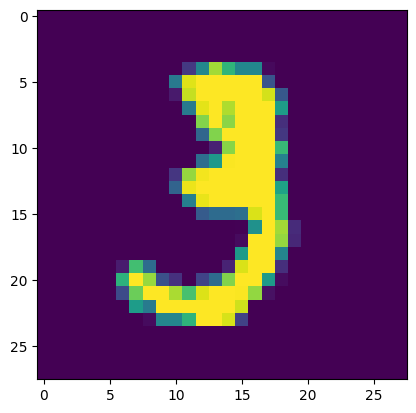

In [10]:
dataset = MNIST("/data", download=True, train=True)

image, label = dataset[10]
plt.imshow(image)

train_images, train_labels = list(), list()
total_train = 1000
for image, label in dataset:
    total_train -= 1
    if total_train == 0: break
    else: 
        train_images.append(transform_image(image))
        train_labels.append(transform_label(label))

print(train_images[10], train_labels[10])
print(len(train_images), len(train_labels))

In [11]:
# network
net = Network()
net.add(FullyConnectedLayer(28*28, 126))
net.add(ActivationLayer(tanh, tanh_derivation))
net.add(FullyConnectedLayer(126, 48))
net.add(ActivationLayer(tanh, tanh_derivation))
net.add(FullyConnectedLayer(48, 10))
net.add(ActivationLayer(tanh, tanh_derivation))


# train
net.set_loss(mse, mse_dervivation)
net.fit(train_images, train_labels, epochs=20, lr=0.1)

# test
test_image, test_label = dataset[1001]
out = net.predict(transform_image(test_image))
print(out, test_label)

epoch 1/20   error=899.100000
epoch 2/20   error=899.100000
epoch 3/20   error=899.100000
epoch 4/20   error=899.100000
epoch 5/20   error=899.100000
epoch 6/20   error=899.100000
epoch 7/20   error=899.100000
epoch 8/20   error=899.100000
epoch 9/20   error=899.100000
epoch 10/20   error=899.100000
epoch 11/20   error=899.100000
epoch 12/20   error=899.100000
epoch 13/20   error=899.100000
epoch 14/20   error=899.100000
epoch 15/20   error=899.100000
epoch 16/20   error=899.100000
epoch 17/20   error=899.100000
epoch 18/20   error=899.100000
epoch 19/20   error=899.100000
epoch 20/20   error=899.100000
[array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])] 7
